In [54]:
import numpy as np
import scipy
import librosa as lr
from matplotlib import pyplot as plt
import IPython.display as ipd

In [59]:
## Load Audio Signal
def AudioShow(y, sr, title=None):
    time = np.linspace(0, len(y)/sr, len(y))
    plt.figure(figsize=(15, 3))
    plt.plot(time, y)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    if title:
        plt.title(title)
    plt.xlim(0, time[-1])
    plt.grid()
    plt.show()

def AudioRead(path, plotopt=True):
    y, sr = lr.load(path, sr=None)
    time = np.linspace(0, len(y)/sr, len(y))
    print("{} samples loaded in {} Hz".format(len(y),sr))
    print(f"Total duration: {time[-1]:.2f} seconds")
    
    if plotopt:
        AudioShow(y, sr)
    return y, sr

850966 samples loaded in 48000 Hz
Total duration: 17.73 seconds
960 320 160


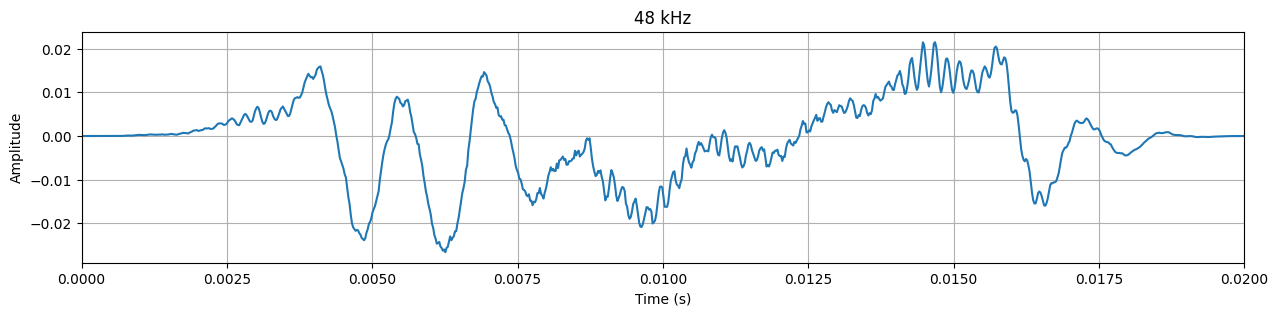

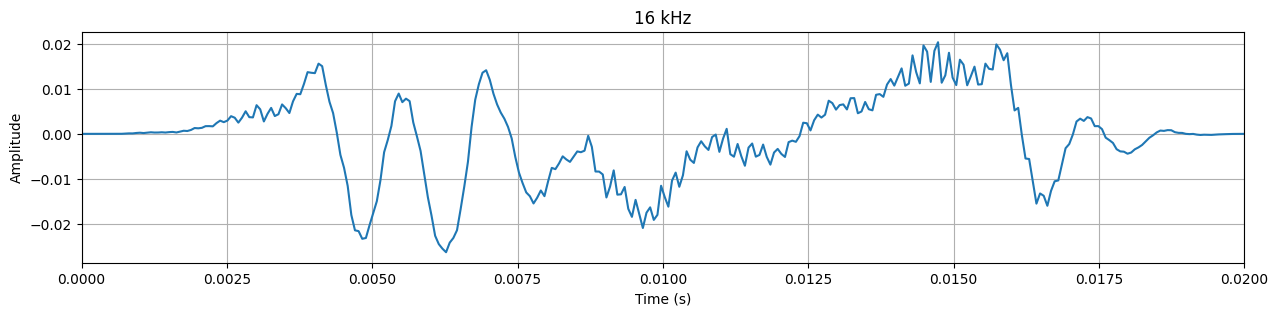

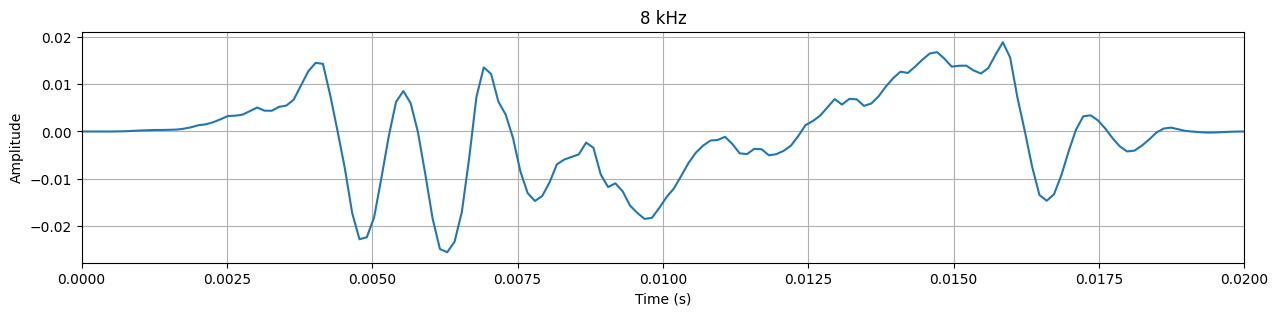

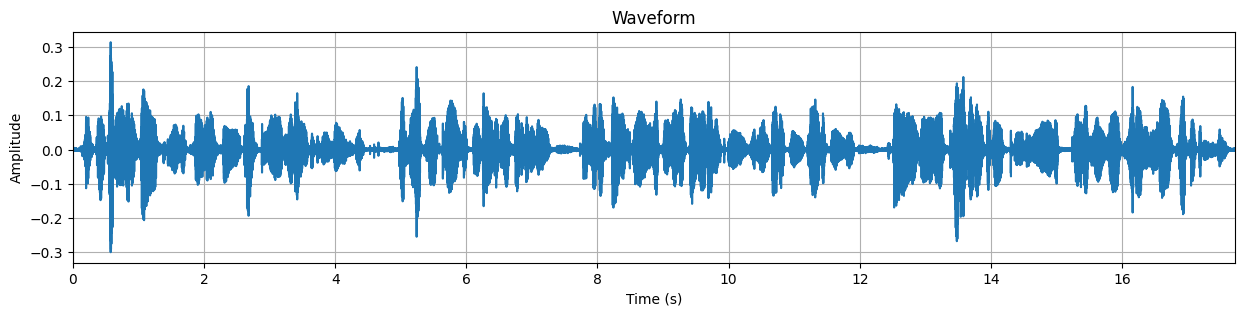

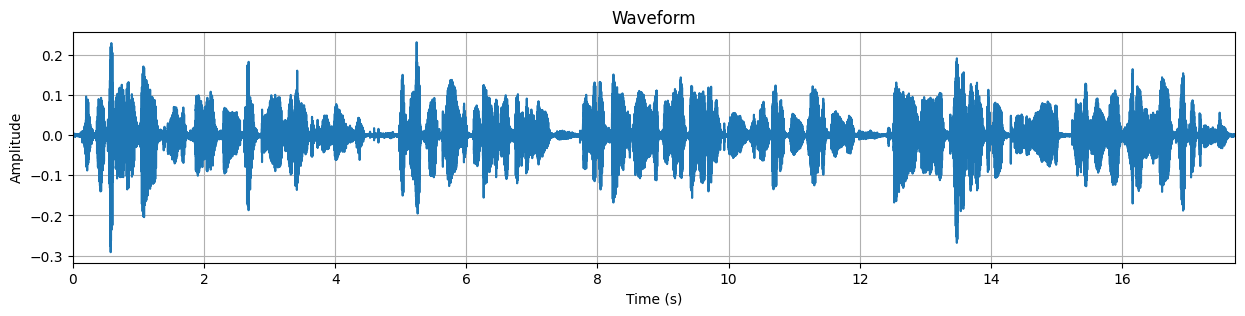

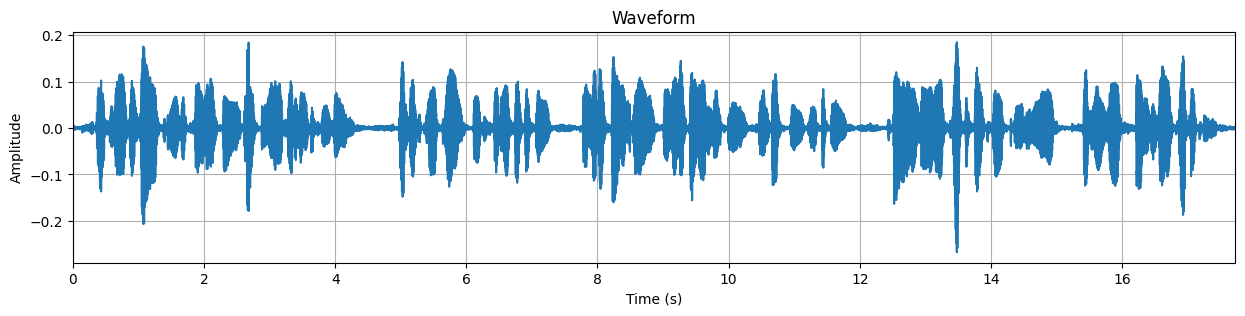

In [78]:
path = "speech.wav"
# Load Waves
y, sr = AudioRead(path, plotopt=False)
target_sr2 = 16000
y2 =lr.resample(y, orig_sr=sr, target_sr=target_sr2)
target_sr3 = 8000
y3 =lr.resample(y, orig_sr=sr, target_sr=target_sr3)

# 20 ms at 48 kHz
win_len = int((0.02) * sr)
win_len2 = int(0.02 * target_sr2)
win_len3 = int(0.02 * target_sr3)
print(win_len, win_len2, win_len3)

frame1 = y[72000:72000+win_len] * scipy.signal.get_window('hann', win_len)
frame2 = y2[24000:24000+win_len2] * scipy.signal.get_window('hann', win_len2)
frame3 = y3[12000:12000+win_len3] * scipy.signal.get_window('hann', win_len3)

# Plot Audio Wave
AudioShow(frame1, sr=sr, title="48 kHz")
AudioShow(frame2, sr=target_sr2, title="16 kHz")
AudioShow(frame3, sr=target_sr3, title="8 kHz")

AudioShow(y, sr=sr)
AudioShow(y2, sr=target_sr2)
AudioShow(y3, sr=target_sr3)

ipd.Audio(frame1, rate=sr)



In [93]:
def AudioSpec(signal, sr, n_fft=1024, title=None, xlim=None, PlotPhase=False):

    freqs = np.linspace(0, sr/2, n_fft//2) / 1000 
    signal_f = np.fft.rfft(signal, n_fft)[:-1]
    figsize = (18,2)

    # Plot FFT Magnitude Spectrum in DB Scale
    plt.figure(figsize=figsize)
    plt.plot(freqs, 20 * np.log10(np.abs(signal_f)), label='Original')
    plt.grid(True)
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Amplitude (dB)')
    if title:
        title_m = "Magnitude " + title
        plt.title(title_m)
        
    if xlim:
        xlim = xlim
    else:
        xlim = [0,sr//2/1000]
    
    plt.xlim(xlim)
    step = xlim[-1] / 8
    tick_marks = np.arange(xlim[0],xlim[-1]+0.1,  step)
    plt.xticks(tick_marks,[f"{(x)} kHz" for x in tick_marks])
    plt.show()
    
    if PlotPhase:
        plt.figure(figsize=figsize)
        plt.plot(freqs, (np.angle(signal_f)), label='Original')
        plt.grid(True)
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('Phase (rad)')
        plt.title("Phase Spectrum")
        
        if title:
            title_p = "Phase " + title
            plt.title(title_p)
            
        if xlim:
            xlim = xlim
        else:
            xlim = [0,sr//2/1000]
        
        plt.xlim(xlim)
        step = xlim[-1] / 8
        tick_marks = np.arange(xlim[0],xlim[-1]+0.1,  step)
        plt.xticks(tick_marks,[f"{(x)} kHz" for x in tick_marks])
        
        # y_ticks = np.array([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
        # y_labels = ['$-\pi$', '$-\\frac{\pi}{2}$', '0', '$\\frac{\pi}{2}$', '$\pi$']
        y_ticks = np.array([-np.pi, 0, np.pi])
        y_labels = ['$-\pi$',  '0', '$\pi$']
        plt.yticks(y_ticks, y_labels)
        plt.show()

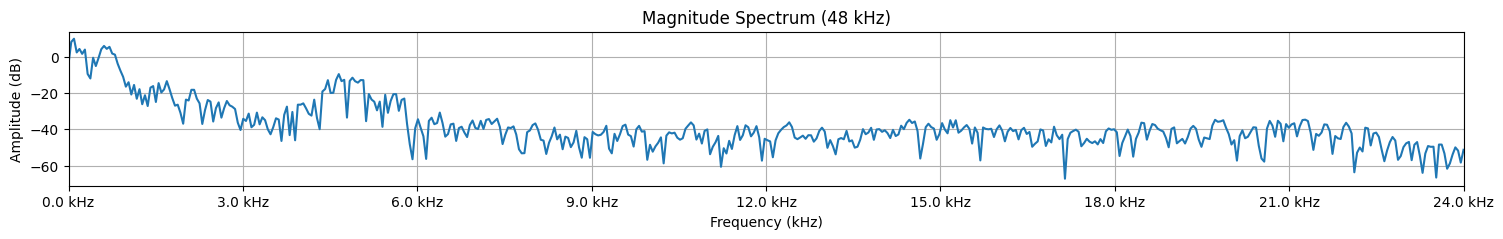

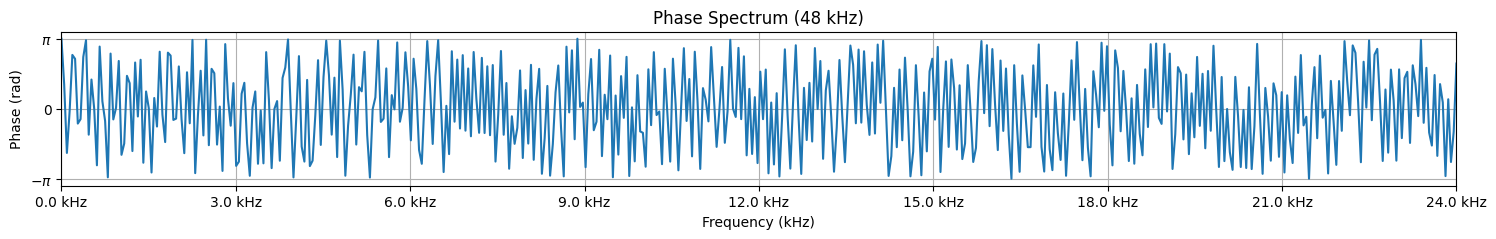

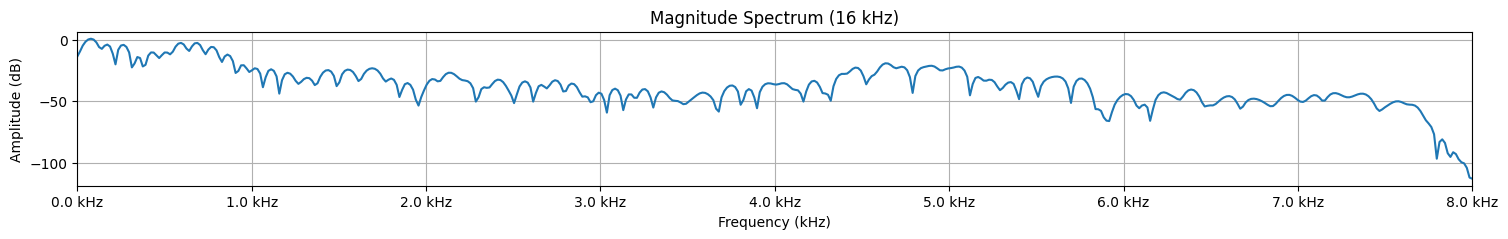

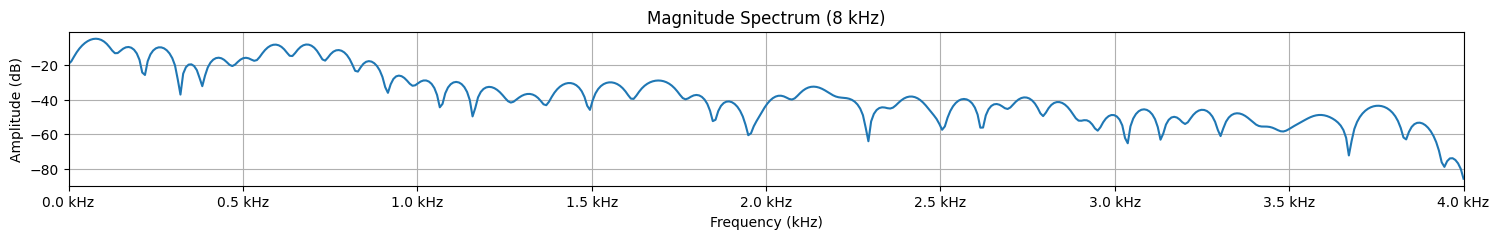

In [94]:
AudioSpec(frame1, sr=sr, PlotPhase=True, title="Spectrum (48 kHz)")
AudioSpec(frame2, sr=target_sr2, PlotPhase=False, title="Spectrum (16 kHz)")
AudioSpec(frame3, sr=target_sr3, PlotPhase=False, title="Spectrum (8 kHz)")